<a href="https://colab.research.google.com/github/Devkhiran/EDA-Hotel-Booking/blob/main/Dev_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# IMPORTING LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
# MOUNTING GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTING DATASET

path = '/content/drive/MyDrive/Colab Notebooks/Projects/Hotel Bookings/Hotel Bookings.csv'
hbdf = pd.read_csv(path)


In [ ]:
# TOP 5 ROWS OF THE DATA SET

hbdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hbdf.shape

(119390, 32)

In [ ]:
# BOTTOM 5 ROWS OF THE DATA SET

hbdf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# DATA FRAME INFO

hbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# STATISTICS INFORMATION OF NUMERICAL COLUMNS FROM THE DATA FRAME

hbdf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# NUMBERS OF COLUMNS AND NUMBERS OF ROWS

hbdf.shape

(119390, 32)

In [ ]:
# TRANSPOSING THE DATA

hbdf.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
# TOTAL NUMBER OF MISSING VALUE IN THE DATA FRAME(DF)

total_missing_value = sum(pd.to_numeric(hbdf.isnull().sum()))
total_missing_value

129425

**DATA CLEANING**






In [ ]:
# WHICH COLUMN HAVE MISSING VALUES

hbdf.isna().any()[lambda x: x].index.tolist()

['children', 'country', 'agent', 'company']

In [ ]:
# NUMBER OF NULL VALUE IN EACH COLUMN

hbdf.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**THESE ARE THE COLUMNS WHICH HAVE NULL VALUES:**



1.   children 
2.   country
3.   agent
4.   company




In [ ]:
miss_val = hbdf.isna().any()[lambda x: x].index.tolist()

In [ ]:
miss_val

['children', 'country', 'agent', 'company']

In [ ]:
col_miss_v = hbdf[miss_val]

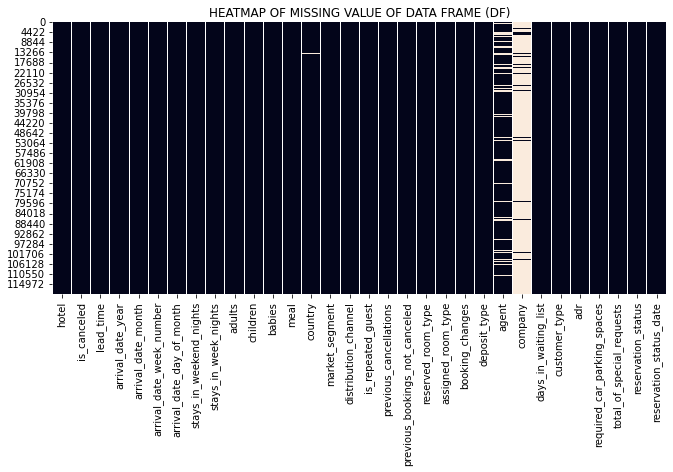

In [ ]:
# HEATMAP SHOWING MISSING VALUE WITH COLUMN WHICH HAVE MISSING COLUMN

plt.figure(figsize = (11,5))
sns.heatmap(hbdf.isnull(), cbar=False)
plt.title("HEATMAP OF MISSING VALUE OF DATA FRAME (DF)")
plt.show()

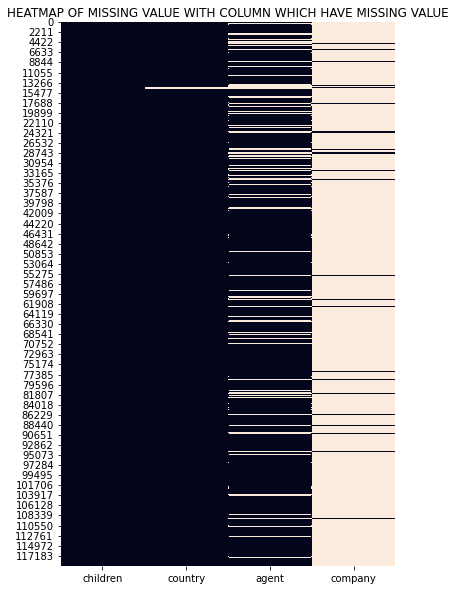

In [ ]:
plt.figure(figsize = (6,10))
sns.heatmap(col_miss_v.isnull(), cbar=False)
plt.title("HEATMAP OF MISSING VALUE WITH COLUMN WHICH HAVE MISSING VALUE")
plt.show()

In [ ]:
# COVERTING ALL THE NULL VALUES TO 0 IN THE DATA FARME

hbdf = hbdf.fillna(0)

In [ ]:
# VERIFYING THE TOTAL NUMBERS OF NULL VALUES STILL PRESENT IN THE DATA FRAME

hbdf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# IN COUNTRY COLUMN REPLACING 0 WITH UNDEFINED BECAUSE COUNTRY IS A CATEGORICAL COLUMN

hbdf.country = hbdf.country.replace(0, "undefined")

In [ ]:
# VERIFYING ALL THE UNIQUE IN COUNTRY COLUMN

hbdf.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'undefined', 'ROU',
       'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC',
       'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA',
       'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX',
       'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR',
       'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE',
       'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG',
       'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
       'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK',
       'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA',
       'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI',
       'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN',
       'DJI', 'STP', '

**--> DATA CLEANING IS COMPLETED HERE!**

## **EXPLORATORY DATA ANALYSIS**

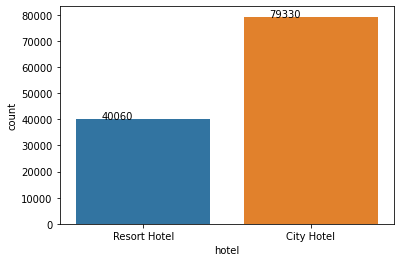

In [ ]:
#countplot with data labels
ax = sns.countplot(x="hotel", data=hbdf)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

plt.show()


### **--> CITY HOTEL HAS MORE GUEST THAN RESORT HOTEL IN LAST 3 YEARS**

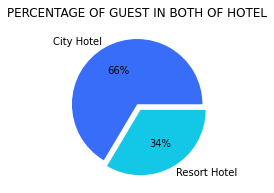

In [ ]:
# PERCENTAGE OF GUEST IN BOTH OF HOTEL

plt.figure(figsize = (3,3))
index = hbdf.hotel.value_counts().index.tolist()
value = hbdf.hotel.value_counts()

palette_color = sns.color_palette('rainbow')
plt.pie(value, labels=index, colors=palette_color,explode= [0, 0.1], autopct='%.0f%%')
plt.title("PERCENTAGE OF GUEST IN BOTH OF HOTEL")
plt.show()

### **--> CITY HOTLE HAVE 66% OF GUEST AND THE REST IN RESORT HOTEL AND THAT IS 34%**

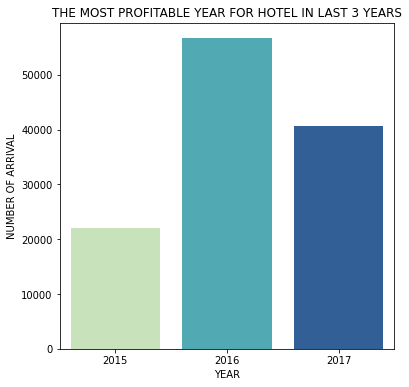

In [ ]:
# WHICH YEAR IS THE MOST PROFITABLE YEAR FOR HOTEL IN LAST 3 YEARS

plt.figure(figsize=(6,6))
sns.countplot(x=hbdf['arrival_date_year'], palette='YlGnBu')
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("THE MOST PROFITABLE YEAR FOR HOTEL IN LAST 3 YEARS")

plt.show()

## **--> 2016 IS THE MOST PROFITABLE YEAR FOR HOTEL**

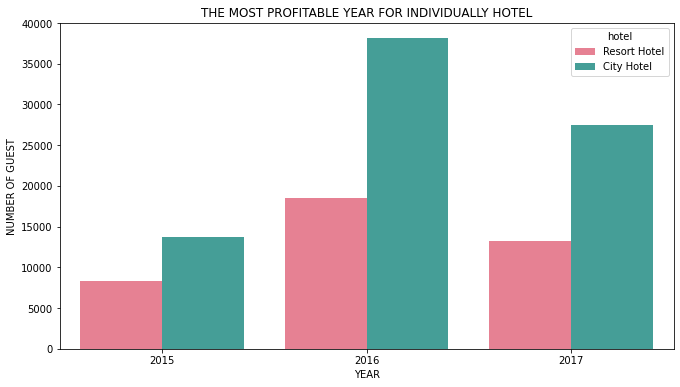

In [ ]:
# THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL

plt.figure(figsize=(11,6))
sns.countplot('arrival_date_year', hue = 'hotel', data= hbdf, palette="husl")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF GUEST")
plt.title("THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL")
plt.show()


**--> ALL 3 YEARS CITY HOTEL HAVE MADE MORE PROFIT THAN RESORT HOTEL**

**--> 2016 IS THE MOST PROFITABLE FOR BOTH OF THE HOTEL**

**--> ALL 3 YEARS CITY HOTEL HAVE MORE NUMBER OF GUEST THAN RESORT HOTEL**

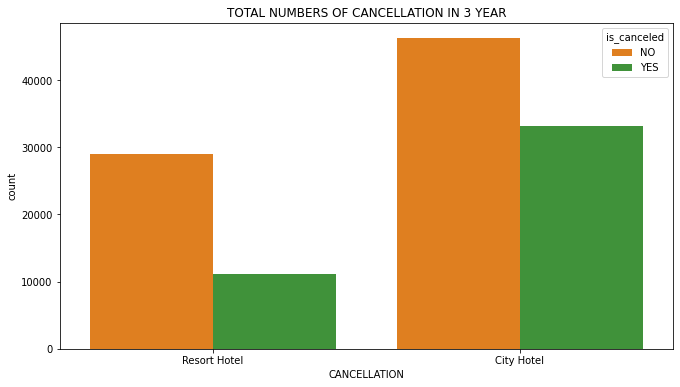

In [ ]:
# TOTAL CANCELLATION OF BOOKING IN 3 YEARS


edit_hbdf = hbdf.copy() # COPING DATA SET TO MAKE CHANGES FOR BETTER UNDERSTANDING OF END USER

edit_hbdf["is_canceled"] = edit_hbdf.is_canceled.replace([0,1],["NO","YES"])


plt.figure(figsize=(11,6))
sns.countplot("hotel", hue= "is_canceled" , data = edit_hbdf, palette="Paired_r")
plt.xlabel("CANCELLATION")
plt.title("TOTAL NUMBERS OF CANCELLATION IN 3 YEAR")
plt.show()

**--> NUMBER OF BOOKING CANCELLATION IS MORE THAN 50% OF TOTAL BOOKING**

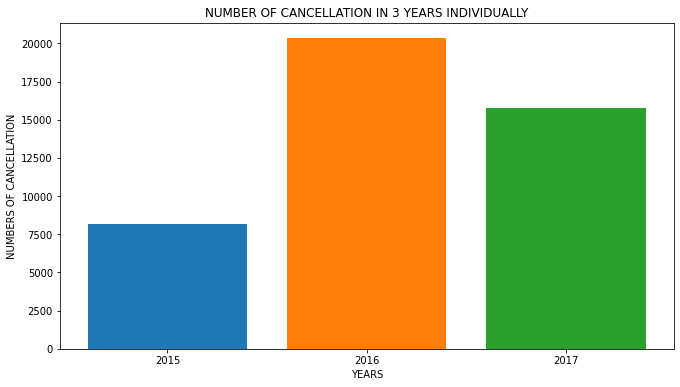

In [ ]:
# CANCELLATION OF BOOKING IN 3 YEARS INDIVIDUALLY


x = ["2015", "2016", "2017"]
y = []
for i in x:
  y.append(hbdf[hbdf["arrival_date_year"] == int(i)][hbdf[hbdf["arrival_date_year"] == int(i)]["is_canceled"] == 1]["is_canceled"].count())


plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette())
plt.xlabel("YEARS")
plt.ylabel("NUMBERS OF CANCELLATION")
plt.title("NUMBER OF CANCELLATION IN 3 YEARS INDIVIDUALLY")
plt.show()

**-->2016 HAS THE HIGHEST NUMBERS OF CANCELLATION IN 3 YEARS**

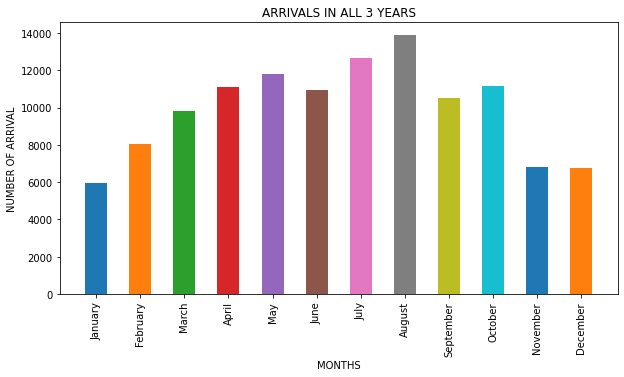

In [ ]:
# WHICH MONTH HAVE THE MOST NUMBER OF GUEST IN ALL 3 YEARS (SUMMED OF ALL 3 YEAR AS PER THE MONTH)

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] #COMMON FOR ALL THE TABLE
z = list(hbdf["arrival_date_month"].unique())
y = []

for i in x:
  y.append(hbdf[hbdf.arrival_date_month == i]["arrival_date_month"].count())


plt.figure(figsize=(10,5))
plt.bar(x, y, color = sns.color_palette(),
        width = 0.5)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN ALL 3 YEARS")
plt.show()

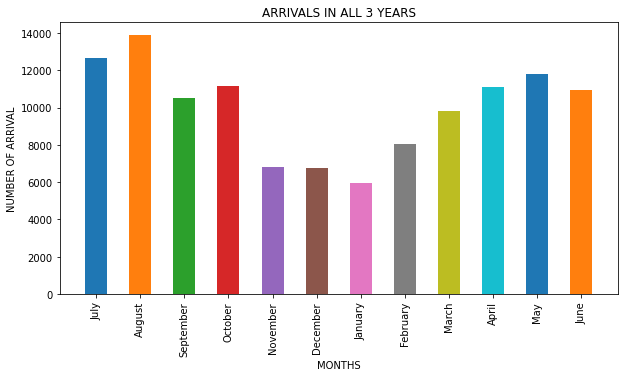

In [ ]:
z = list(hbdf["arrival_date_month"].unique())
y = []

for i in z:
  y.append(hbdf[hbdf.arrival_date_month == i]["arrival_date_month"].count())


plt.figure(figsize=(10,5))
plt.bar(z, y, color = sns.color_palette(),
        width = 0.5)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN ALL 3 YEARS")
plt.show()

**--> AUGUST HAVE MORE NUMBER GUEST THAN ANY OTHER MONTHS**

**--> JULY HAS THE SECOND HIGHEST NUMBER OF GUEST AFTER AUGUST**

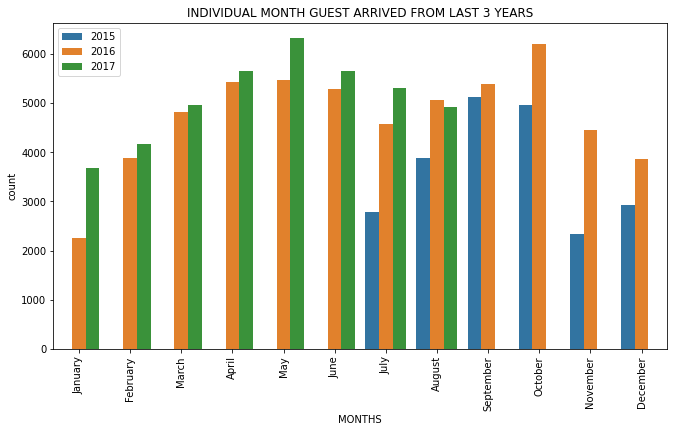

In [ ]:
plt.figure(figsize= (11,6))

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot("arrival_date_month", hue="arrival_date_year", data=hbdf, order= x)
plt.xticks(rotation = "vertical")
plt.xlabel("MONTHS")
plt.title("INDIVIDUAL MONTH GUEST ARRIVED FROM LAST 3 YEARS")
plt.legend(loc="upper left")
plt.show()

**--> ONLY JULY AND AUGUST ARE IN ALL 3 YEARS THATS WHY MORE GUEST IS IN AUGUST AND JULY**

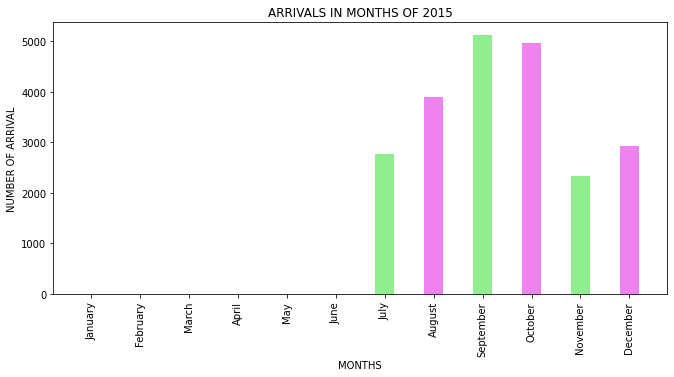

In [ ]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2015
z = list(hbdf[hbdf.arrival_date_year==2015]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2015][hbdf[hbdf["arrival_date_year"] == 2015]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)

plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'],
        width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2015")
plt.show()

**--> IN 2015, SEPTEMBER HAS THE HIGHEST NUMBERS OF ARRIVALS**

**--> IN DATASET, DATA IS FROM JULY 2015**

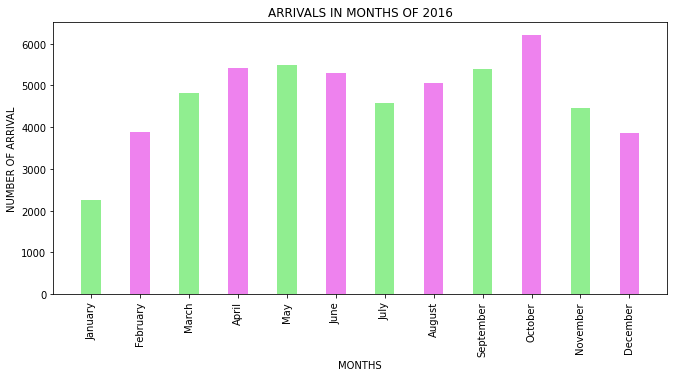

In [ ]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2016

z = list(hbdf[hbdf.arrival_date_year==2016]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2016][hbdf[hbdf["arrival_date_year"] == 2016]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)


plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'], width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2016")
plt.show()

**--> IN 2016, OCTOBER HAS THE HIGHEST NUMBERS OF ARRIVALS**

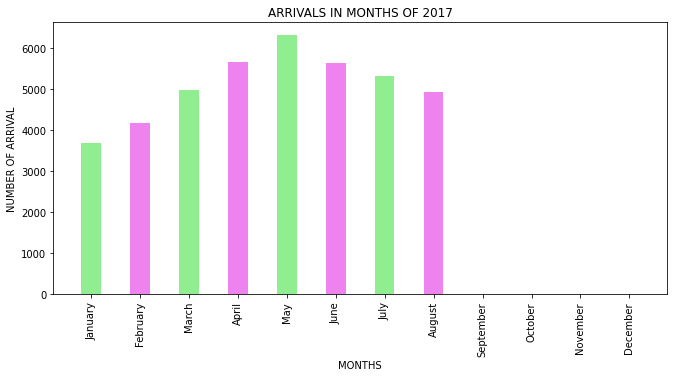

In [ ]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2017

z = list(hbdf[hbdf.arrival_date_year==2017]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2017][hbdf[hbdf["arrival_date_year"] == 2017]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)

plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'],
        width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2017")
plt.show()

**--> IN 2017, MAY HAS THE HIGHEST NUMBERS OF ARRIVALS**

**--> IN DATA SET DATA IS ONLY AVAILABLE TILL AUGUST 2017**

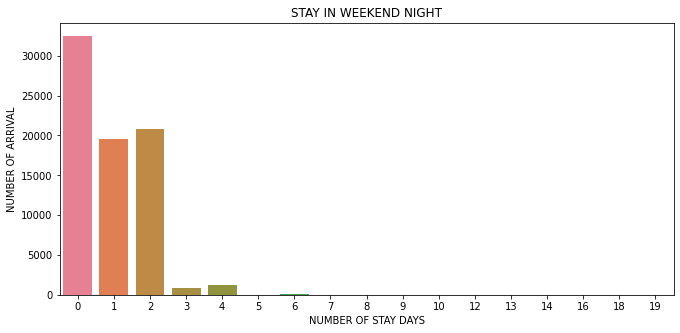

In [ ]:
# STAY IN WEEKEND NIGHT

edit_hbdf = edit_hbdf[edit_hbdf["is_canceled"] != "YES"] # EDITING DATA SET IN EDIT_hBDF


plt.figure(figsize=(11,5))
sns.countplot('stays_in_weekend_nights',palette='husl', data = edit_hbdf)
plt.xlabel("NUMBER OF STAY DAYS")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("STAY IN WEEKEND NIGHT")
plt.show()

**--> MOST OF THE TRAVELLERS WHO ARRIVED IN HOTEL ON WEEKEND LEFT THE HOTEL ON THE SAME DAY!**

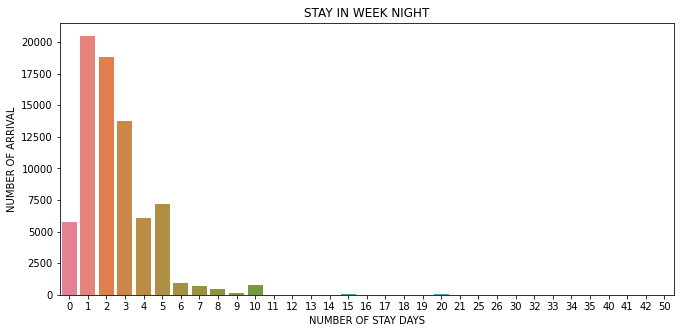

In [ ]:
# STAY IN WEEK NIGHT

plt.figure(figsize=(11,5))
sns.countplot('stays_in_week_nights',palette='husl' , data = edit_hbdf)
plt.xlabel("NUMBER OF STAY DAYS")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("STAY IN WEEK NIGHT")
plt.show()

**--> MOST OF THE TRAVELLERS WHO ARRIVED IN HOTEL ON WEEK DAY LEFT THE HOTEL ON THE NEXT DAY!**

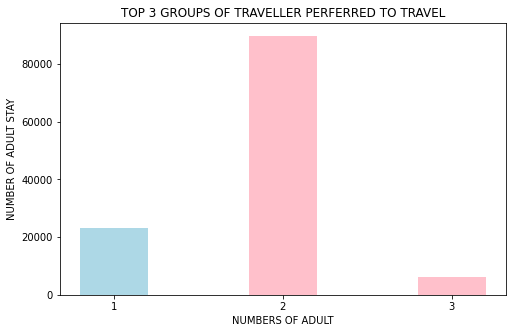

In [ ]:
# TOP 3 GROUPS OF TRAVELLERS PREFERED TO TRAVEL (SOLO, COUPLE OR IN GROUP OF 3)


x = hbdf['adults'].unique()[:3]
y = hbdf['adults'].value_counts()[:3]

plt.figure(figsize=(8,5))
plt.bar(x, y, color =['pink', 'lightblue'], width = 0.4)
plt.xlabel("NUMBERS OF ADULT")
plt.ylabel("NUMBER OF ADULT STAY")
plt.title("TOP 3 GROUPS OF TRAVELLER PERFERRED TO TRAVEL")
plt.xticks(np.arange(1, 4))
plt.show()

**--> COUPLE GUEST HAS MORE CHECK-INS THAN ANY OTHER NUMBER OF GUESTS**

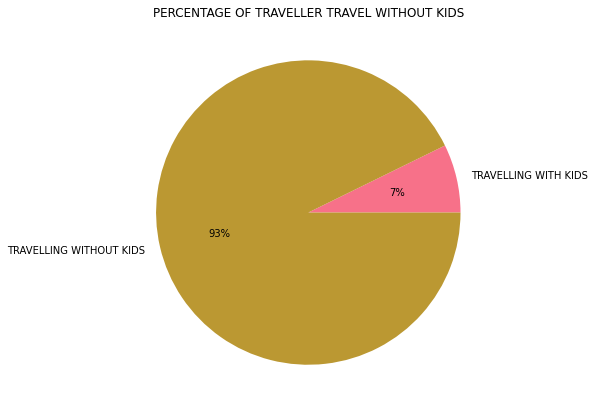

In [ ]:
# NUMBERS OF ADULTS TRAVEL WITH CHILDREN OR BABIES

x = ["TRAVELLING WITH KIDS", "TRAVELLING WITHOUT KIDS"]
y = [hbdf[(hbdf.children != 0) | (hbdf.babies != 0)]["adults"].count(), hbdf[(hbdf.children == 0) | (hbdf.babies == 0)]["adults"].count()]

fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('husl')
plt.pie(y, labels = x, colors = colors, autopct='%.0f%%')
plt.title("PERCENTAGE OF TRAVELLER TRAVEL WITHOUT KIDS")
plt.show()

**--> ONLY 7% OF TRAVELLERS, TRAVEL WITH THEIR KIDS IN 3 YEARS**

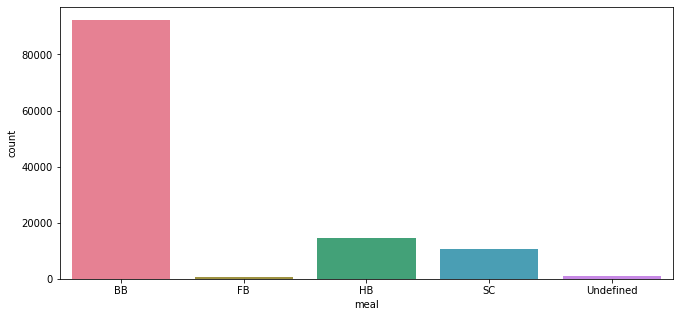

In [ ]:
# Undefined/SC – no meal package
# BB – Bed & Breakfast
# HB – Half board (breakfast and one other meal – usually dinner)
# FB – Full board (breakfast, lunch and dinner)

plt.figure(figsize=(11,5))
sns.countplot(x=hbdf['meal'], palette='husl')
plt.show()

**--> MORE THAN 70% OF HOTELS PROVIDE BED AND BREAKFAST**


In [ ]:
 # TABLE OF WHAT HOTEL PROVIDE WHAT TYPE OF MEAL!

hbdf.groupby("hotel")["meal"].agg(value = ("value_counts"))

value
hotel        meal            
City Hotel   BB         62305
             SC         10564
             HB          6417
             FB            44
Resort Hotel BB         30005
             HB          8046
             Undefined   1169
             FB           754
             SC            86

**--> HOTELS WITH THE TYPE OF MEAL THEY *PROVIDE*!**

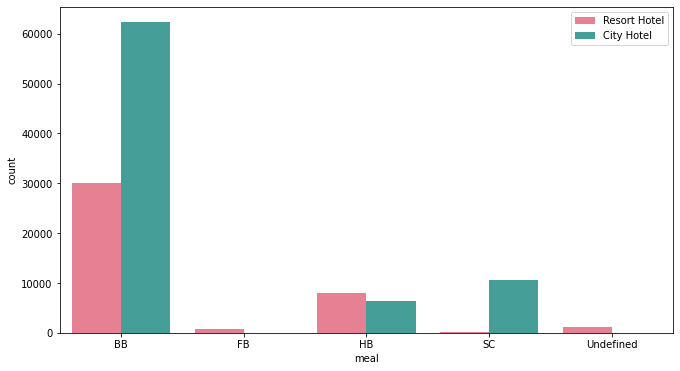

In [ ]:
# GRAPH OF UPPER TABLE!

plt.figure(figsize=(11,6))
sns.countplot(x = "meal", hue = "hotel",palette='husl', data = hbdf);
plt.legend(loc='upper right')
plt.show()

**--> BOTH TYPE OF HOTEL, CITY HOTEL OR RESORT HOTEL PROVIDE BED AND BREAKFAST SERVICE**

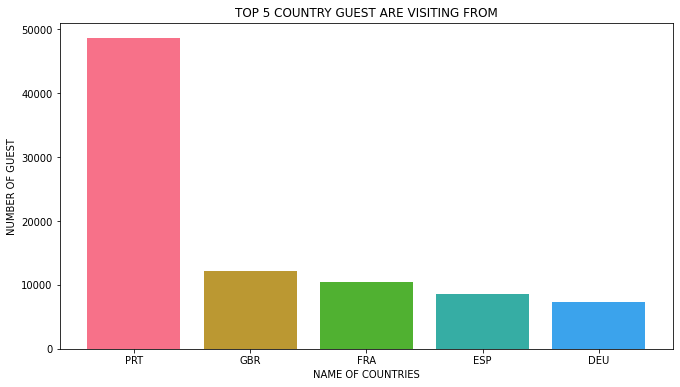

In [ ]:
# WHAT ARE THE TOP 5 COUNTRIES MAX NUMBER OF GUEST IS COMING?
# PRT :- Portugal
# GBR :- United Kingdom
# FRA :- France
# ESP :- Spain
# DEU :- Germany

x = list(hbdf['country'].value_counts().index.tolist()[0:5])
y = list(hbdf['country'].value_counts()[:5])

plt.figure(figsize=(11,6))

plt.bar(x,y, color = sns.color_palette("husl"))
plt.xlabel("NAME OF COUNTRIES")
plt.ylabel("NUMBER OF GUEST")
plt.title("TOP 5 COUNTRY GUEST ARE VISITING FROM")
sns.color_palette("hls")
plt.show()

**--> FROM COUNTRY PRT MORE NUMBER OF GUEST VISITED IN LAST 3 YEARS**

**--> 40% GUESTS ARE FROM PRT**

## MARKET SEGMENT

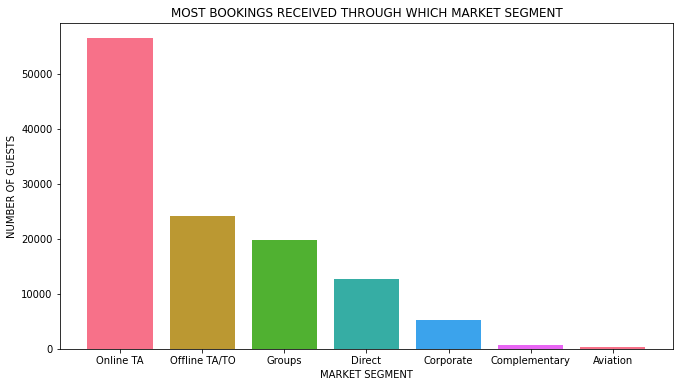

In [ ]:
# MOST OF HOTEL BOOKING WERE MADE AND BY WHICH MARKET SEGMENT
# TA :- TRAVEL AGENT
# TO :- TRAVEL OPERATER

x = list(hbdf.market_segment.value_counts().index.tolist()[:-1])
y = list(hbdf.market_segment.value_counts()[:-1])


plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette("husl"))
plt.xlabel("MARKET SEGMENT")
plt.ylabel("NUMBER OF GUESTS")
plt.title("MOST BOOKINGS RECEIVED THROUGH WHICH MARKET SEGMENT")
sns.color_palette("hls")
plt.show()

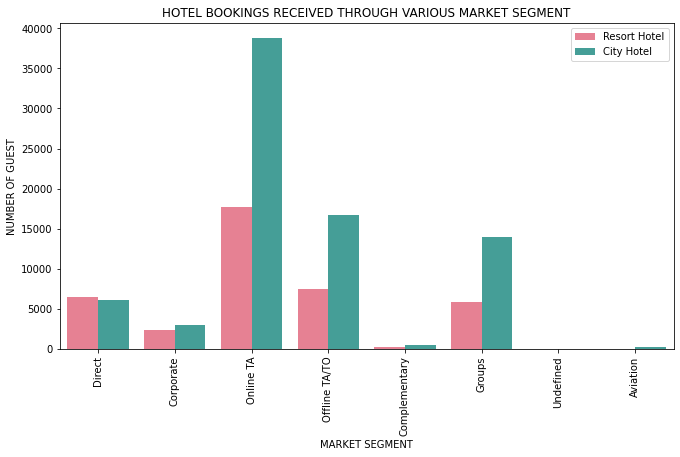

In [ ]:
#  WHAT TYPE OF HOTEL BOOKING WERE MADE AND BY WHICH MARKET SEGMENT

# TA :- TRAVEL AGENT
# TO :- TRAVEL OPERATER

plt.figure(figsize = (11,6))
sns.countplot("market_segment", hue = "hotel", data = hbdf, palette="husl")
plt.xticks(rotation = "vertical")
plt.legend(loc="upper right")
plt.xlabel("MARKET SEGMENT")
plt.title("HOTEL BOOKINGS RECEIVED THROUGH VARIOUS MARKET SEGMENT")
plt.ylabel("NUMBER OF GUEST")
plt.show()

**--> IN BOTH HOTEL, RESORT HOTEL OR CITY HOTEL. MOST OF GUESTS DO BOOKING FROM ONLINE TA**

**--> MORE THAN 45% OF GUEST BOOKED FROM ONLINE TA** 

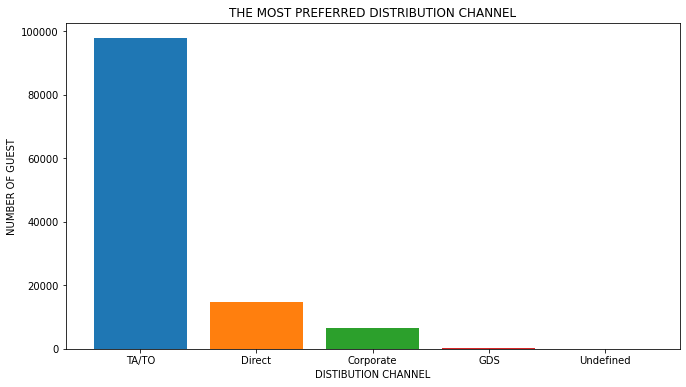

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

In [ ]:
# DISTRIBUTION CHANNEL

# TA :- TRAVEL AGENT
# TO :- TRAVEL OPERATER

y = list(hbdf["distribution_channel"].value_counts())
x = list(hbdf["distribution_channel"].value_counts().index.tolist())

plt.figure(figsize= (11,6))
plt.bar(x, y, color = sns.color_palette ())
plt.ylabel("NUMBER OF GUEST")
plt.xlabel("DISTIBUTION CHANNEL")
plt.title("THE MOST PREFERRED DISTRIBUTION CHANNEL")
plt.show()

hbdf["distribution_channel"].value_counts(']')

**--> MOST OF CHANNEL DISTRIBUTION IS IN TA/TO, WHICH IS MORE THAN 80%**

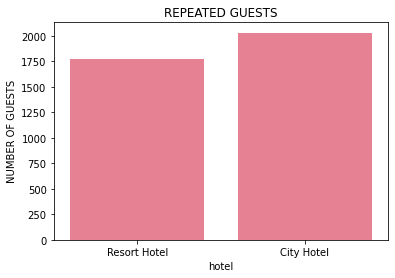

In [ ]:
# WHICH HOTEL HAVE MORE REPEATED GUEST
sns.countplot(hbdf[hbdf.is_repeated_guest == 1]["hotel"], hue= hbdf[hbdf.is_repeated_guest == 1]["is_repeated_guest"], data=hbdf, palette= "husl")
plt.ylabel("NUMBER OF GUESTS")
plt.title("REPEATED GUESTS")
plt.gca().get_legend().remove()
plt.show()

**--> CITY HOTEL HAVE MORE REPEATED GUEST THAN RESORT HOTEL**

**--> BUT RATIO OF REPEATED GUEST IS MORE IN RESORT HOTEL THAN CITY HOTEL, BECAUSE CITY HOTEL HAVE EVERY HIGH NUMBER OF GUEST THAN RESORT HOTEL**

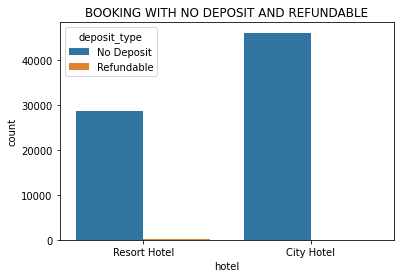

value_counts
hotel        deposit_type              
City Hotel   No Deposit           46198
             Refundable               6
Resort Hotel No Deposit           28749
             Refundable             120

In [ ]:
# NO DEPOSIT AND REFUNDABLE COULD BE A LOSS!

edit_hbdf2 = hbdf[hbdf.is_canceled == 0]

a = edit_hbdf2[edit_hbdf2["deposit_type"] != "Non Refund"]

sns.countplot("hotel", hue = "deposit_type", data = a)
plt.title("BOOKING WITH NO DEPOSIT AND REFUNDABLE")
plt.show()
a.groupby(["hotel"])["deposit_type"].agg(["value_counts"])

**--> NON DEPOSIT BOOKING IS A LOT MORE THAN REFUNDABLE BOOKING**

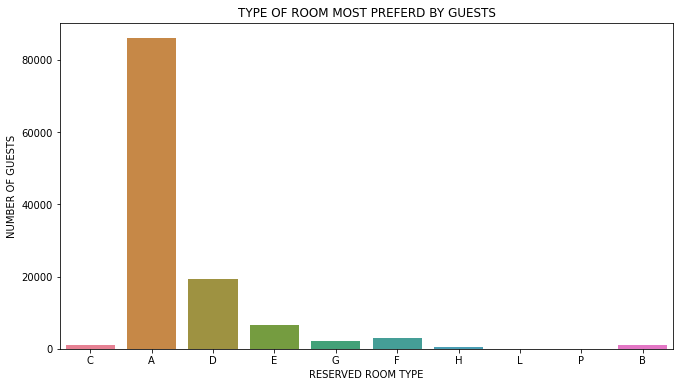

In [ ]:
# TYPE OF ROOM MOST PREFERD BY GUESTS
plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type", data= hbdf, palette= "husl")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM MOST PREFERD BY GUESTS")
plt.show()

**--> MOST OF GUEST RESERVED A TYPE OF ROOM**

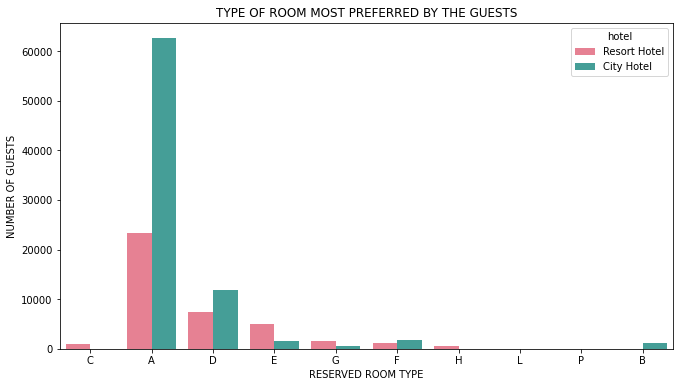

In [ ]:
# IN BOTH TYPE OF HOTEL TYPE OF ROOM MOST PREFERD BY GUESTS 

plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type",hue = "hotel", data= hbdf, palette= "husl")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM MOST PREFERRED BY THE GUESTS")
plt.show()

**--> IN BOTH TYPE OF HOTEL, A IS THE ROOM WHICH GET MORE RESERVED THAN ANY OTHER ROOMS**

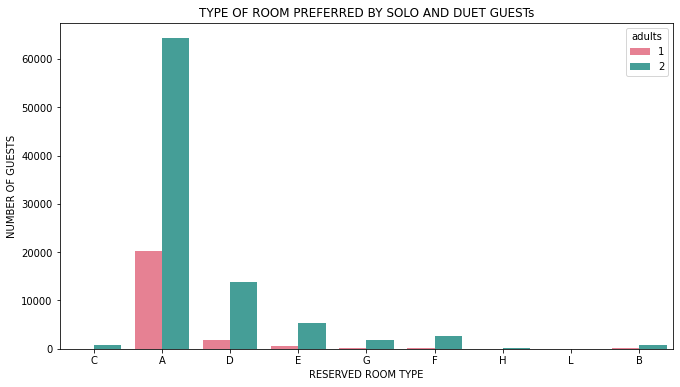

In [ ]:
# TYPE OF ROOM MOST PREFERRED BY SOLO AND DUO GUESTS

a = hbdf[(hbdf.adults == 1) | (hbdf.adults == 2)]
plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type",hue = "adults", data= a, palette= "husl")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM PREFERRED BY SOLO AND DUET GUESTs")
plt.show()

In [ ]:
#HOW MANY GUESTS CHANGE THEIR BOOKINGS?
hbdf.groupby(["hotel"])["booking_changes"].agg(["value_counts"])

value_counts
hotel        booking_changes              
City Hotel   0                       69062
             1                        7232
             2                        2244
             3                         467
             4                         194
             5                          46
             6                          31
             7                          19
             8                           9
             14                          5
             9                           4
             10                          3
             13                          3
             15                          3
             11                          2
             12                          1
             16                          1
             17                          1
             18                          1
             20                          1
             21                          1
Resort Hotel 0                       32252
             1                        5469
             2                        1561
             3                         460
             4                         182
             5                          72
             6                          32
             7                          12
             8                           8
             9                           4
             10                          3
             13                          2
             12                          1
             16                          1
             17                          1

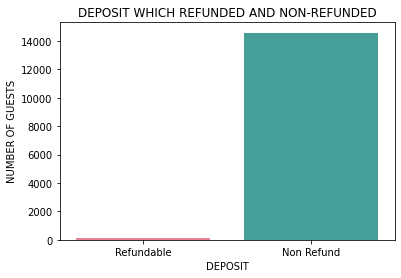

In [ ]:
# DEPOSIT WHICH REFUNDED AND NON-REFUNDED

sns.countplot(hbdf[hbdf["deposit_type"] != "No Deposit"]["deposit_type"], data = hbdf, palette= "husl")
plt.xlabel("DEPOSIT")
plt.ylabel("NUMBER OF GUESTS")
plt.title("DEPOSIT WHICH REFUNDED AND NON-REFUNDED")
plt.show()

**--> MOST OF DEPOSIT WAS NON-REFUNDABLE**

In [ ]:
# AGENT TABLE

hbdf[["agent", "adults"]]

,agent,adults
0,0.0,2
1,0.0,2
2,0.0,1
3,304.0,1
4,240.0,2
...,...,...
119385,394.0,2
119386,9.0,3
119387,9.0,2
119388,89.0,2


In [ ]:
hbdf.groupby(["hotel"])["agent"].agg(["value_counts"])

value_counts
hotel        agent              
City Hotel   9.0           31955
             0.0            8131
             1.0            7137
             14.0           3640
             7.0            3539
...                          ...
Resort Hotel 451.0             1
             472.0             1
             476.0             1
             483.0             1
             497.0             1

[410 rows x 1 columns]

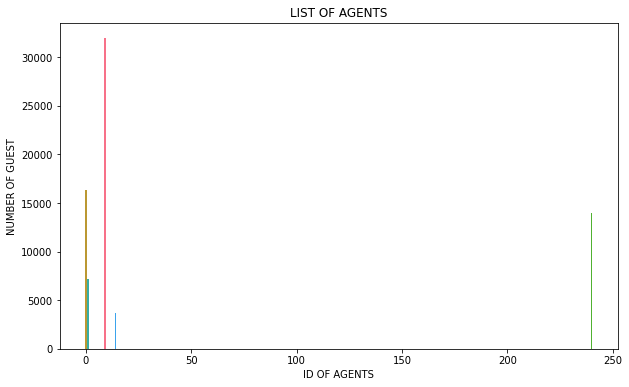

In [ ]:
x = list(hbdf['agent'].value_counts().index.tolist()[0:5])
#y = list(hbdf['agent'].value_counts())
y=[]
for i in x:
  y.append(hbdf[hbdf.agent == i]["agent"].count())


plt.figure(figsize=(10,6))

plt.bar(x,y, color = sns.color_palette("husl"))
plt.xlabel("ID OF AGENTS")
plt.ylabel("NUMBER OF GUEST")
plt.title("LIST OF AGENTS")
sns.color_palette("hls")
plt.show()


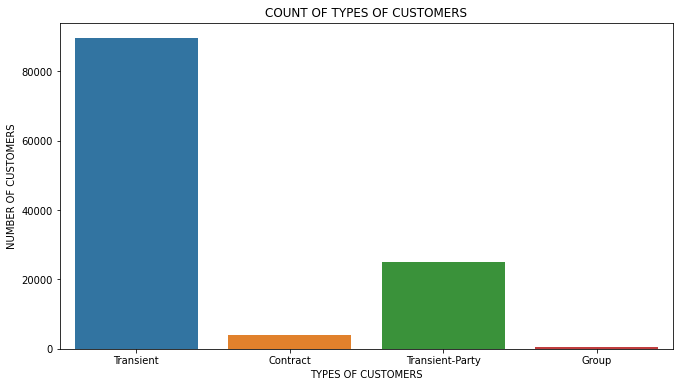

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [ ]:
# COUNT OF TYPES OF CUSTOMERS

plt.figure(figsize = (11, 6))
sns.countplot(hbdf["customer_type"])
plt.xlabel("TYPES OF CUSTOMERS")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("COUNT OF TYPES OF CUSTOMERS")
plt.show()

hbdf["customer_type"].value_counts(']')

**--> 75% TYPE OF GUEST WAS TRANSIENT**

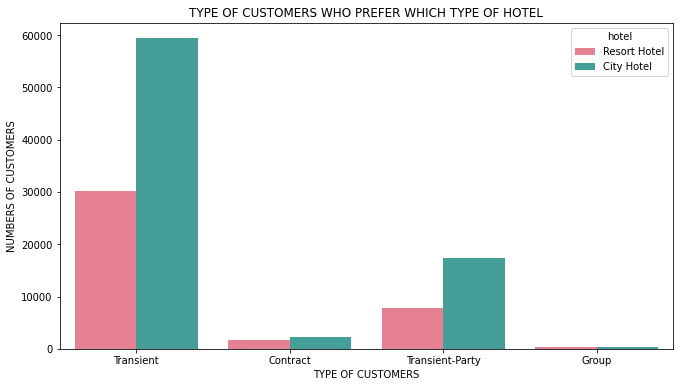

In [ ]:
# TYPE OF CUSTOMERS WHO PERFER WHICH TYPE OF HOTEL

plt.figure(figsize = (11, 6))
sns.countplot(hbdf["customer_type"], hue = hbdf["hotel"], palette= "husl")
plt.xlabel("TYPE OF CUSTOMERS")
plt.ylabel("NUMBERS OF CUSTOMERS")
plt.title("TYPE OF CUSTOMERS WHO PREFER WHICH TYPE OF HOTEL")
plt.show()

In [ ]:
# REQUIRED CAR PARKING SPACES TABLE
hbdf['required_car_parking_spaces'].value_counts()
hbdf.groupby(["hotel"])["required_car_parking_spaces"].agg(["value_counts"])

value_counts
hotel        required_car_parking_spaces              
City Hotel   0                                   77404
             1                                    1921
             2                                       3
             3                                       2
Resort Hotel 0                                   34570
             1                                    5462
             2                                      25
             8                                       2
             3                                       1

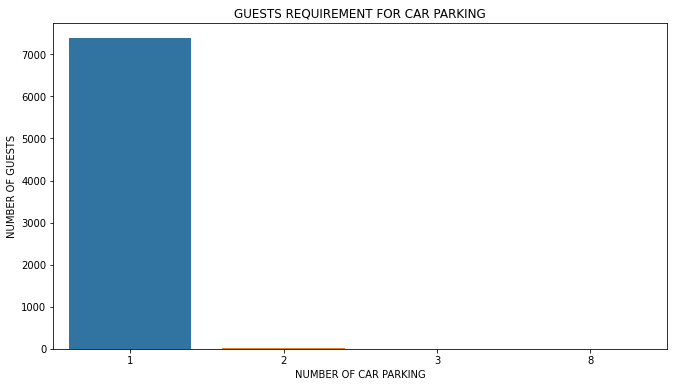

In [ ]:
# GUESTS REQUIREMENT FOR CAR PARKING

plt.figure(figsize = (11,6))
sns.countplot(hbdf[hbdf['required_car_parking_spaces'] > 0 ]['required_car_parking_spaces'], data = hbdf)
plt.xlabel("NUMBER OF CAR PARKING")
plt.ylabel("NUMBER OF GUESTS")
plt.title("GUESTS REQUIREMENT FOR CAR PARKING")
plt.show()

**--> NUMBER OF CAR PARKING REQUIRD 1, 2, 3 AND 8. BUT 1 CAR PARKING IS REQUIRD FROM THE MORE NUMBER OF GUEST**

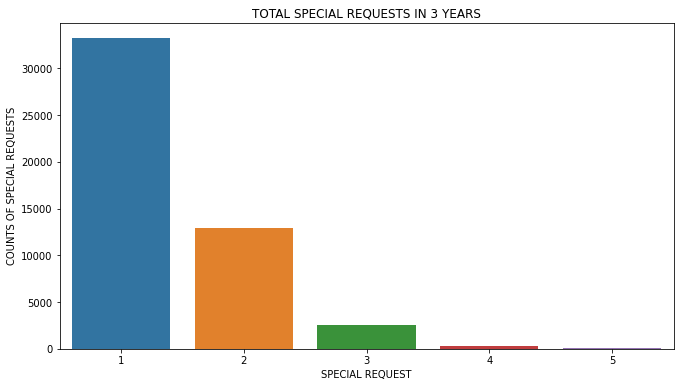

In [ ]:
# TOTAL SPECIAL REQUESTS IN 3 YEARS

plt.figure(figsize = (11,6))
sns.countplot(hbdf[hbdf['total_of_special_requests'] > 0 ]['total_of_special_requests'], data = hbdf)
plt.xlabel("SPECIAL REQUEST")
plt.ylabel("COUNTS OF SPECIAL REQUESTS")
plt.title("TOTAL SPECIAL REQUESTS IN 3 YEARS")
plt.show()

**--> SO 1 NUMBER OF SPECIAL REQUEST IS THE HIGHEST**

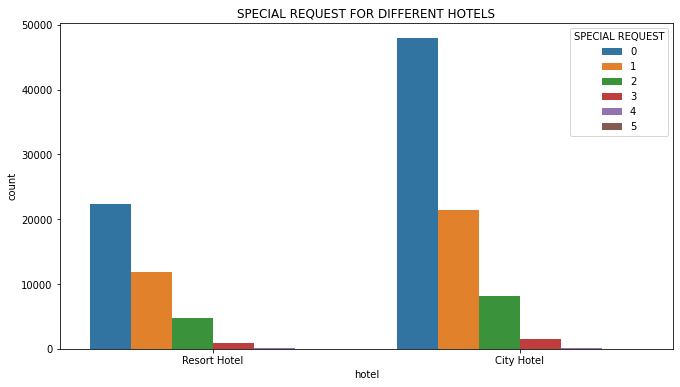

In [ ]:
# SPECIAL REQUEST FOR DIFFERENT HOTELS

a = hbdf.copy()
a["SPECIAL REQUEST"] = a["total_of_special_requests"]

plt.figure(figsize = (11,6))
sns.countplot("hotel", hue = "SPECIAL REQUEST", data = a)
plt.title("SPECIAL REQUEST FOR DIFFERENT HOTELS")
plt.show()

**--> 0 MEANS NO SPECIAL REQUEST! SO BOTH HOTEL HAVE 1 NUMBER OF SPECIAL MORE THAN OTHER NUMBER OF SPECIAL REQUEST** 

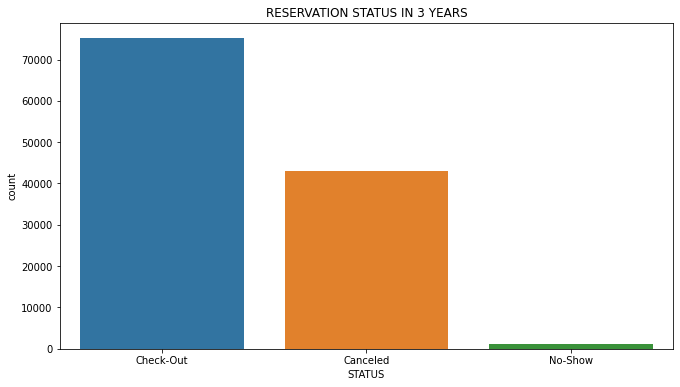

In [ ]:
# RESERVATION STATUS

plt.figure(figsize = (11,6))
sns.countplot("reservation_status", data = hbdf)
plt.xlabel("STATUS")
plt.title("RESERVATION STATUS IN 3 YEARS")
plt.show()

**--> CONCLUSION:**
1. Type A room is in most demand.
2. Most bookings were made from online travel agents.
3. Most customers are from Portugal.
4. Most customers prefer the Bed and breakfast meal type.
5. City hotels are more engaging and in demand. Hence, city hotels are more profitable.
6. City hotels receives a higher number of guests than the resort hotels. However, the cancellation rate is more for city hotels.
7. City hotels have a higher number of repeat customers. However, the ratio of repeat customers is more for resort hotels as the city hotels receives a higher number of guests than the resort hotels.
8. Non-refundable deposits tend to convert to a successful transaction.
9. May is the busier and most profitable month for the hotels in 2017. 
10. On an average, May-June is the busier and most profitable month for the hotels.
11. City hotels have received the most special requests.
12. 1 number of requests is the highest.
13. 1 car parking was needed for most of the guests.